In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE=128
CHANNELS=3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
    'PlantVillage2/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=128,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    shuffle=True
)

Found 70295 images belonging to 38 classes.


In [5]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.42499968 0.42107812 0.48382324]
  [0.4233168  0.41939524 0.48214033]
  [0.42273661 0.41881505 0.48156014]
  ...
  [0.52128744 0.5173659  0.5879541 ]
  [0.528763   0.5248414  0.59542966]
  [0.5187498  0.5148282  0.58541644]]

 [[0.4379181  0.43399653 0.49674162]
  [0.43819255 0.43427098 0.49701607]
  [0.43587172 0.43195015 0.49469528]
  ...
  [0.52216655 0.518245   0.5888332 ]
  [0.52864444 0.5247229  0.5953111 ]
  [0.5176471  0.5137255  0.58431375]]

 [[0.42437318 0.4204516  0.48319674]
  [0.42472523 0.42080367 0.4835488 ]
  [0.42704606 0.4231245  0.4858696 ]
  ...
  [0.52332693 0.51940536 0.5899936 ]
  [0.5269038  0.52298224 0.5935705 ]
  [0.5176471  0.5137255  0.58431375]]

 ...

 [[0.519983   0.5160614  0.5709634 ]
  [0.5184831  0.51456153 0.5694635 ]
  [0.54502887 0.5411073  0.59600925]
  ...
  [0.57166994 0.56774837 0.63049346]
  [0.5722501  0.56832856 0.63107365]
  [0.57254905 0.5686275  0.6313726 ]]

 [[0.5211434  0.5172218  0.57212377]
  [0.5179029  0.51398134 0.5688833 ]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
    'PlantVillage2/valid',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=128,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    shuffle=False  # Typically, we don't shuffle the validation data
)


Found 17572 images belonging to 38 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
    'PlantVillage2/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=128,
    class_mode='sparse',
    shuffle=True  # Disable shuffling
)


Found 33 images belonging to 8 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.63677645 0.6210902  0.60932547]
  [0.63977295 0.6240867  0.612322  ]
  [0.6427694  0.6270831  0.6153184 ]
  ...
  [0.6258329  0.61014664 0.6140682 ]
  [0.62194324 0.60625696 0.61017853]
  [0.6242706  0.60858434 0.6125059 ]]

 [[0.63679254 0.62110627 0.60934156]
  [0.634795   0.61910874 0.607344  ]
  [0.63279736 0.6171111  0.6053464 ]
  ...
  [0.6253335  0.6096472  0.6135688 ]
  [0.62144387 0.6057576  0.60967916]
  [0.62576884 0.61008257 0.61400414]]

 [[0.6661719  0.65048563 0.6387209 ]
  [0.6611779  0.6454916  0.6337269 ]
  [0.6561838  0.6404975  0.6287328 ]
  ...
  [0.6248341  0.60914785 0.6130694 ]
  [0.62094444 0.60525817 0.60917974]
  [0.62726706 0.6115808  0.61550236]]

 ...

 [[0.37957552 0.36388925 0.35212454]
  [0.40267318 0.3869869  0.3752222 ]
  [0.4169757  0.40128943 0.38952473]
  ...
  [0.4705959  0.4313802  0.42745864]
  [0.46909764 0.42988196 0.4259604 ]
  [0.46759945 0.42838377 0.4244622 ]]

 [[0.3835708  0.36788452 0.3561198 ]
  [0.403672   0.38798574 0.37622103]


In [12]:
#80% ==>training
#20%==> 10% validation,10% test
cnn = Sequential()

In [13]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
cnn.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))


In [15]:
cnn.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [16]:
cnn.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [17]:
#cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
#cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(Dropout(0.25))

In [19]:
cnn.add(Flatten())

In [20]:
cnn.add(Dense(units=512, activation='relu'))

In [21]:
cnn.add(Dropout(0.4))

In [22]:
#Output Layer
cnn.add(Dense(units=38, activation='softmax'))


In [23]:
# Replace the legacy optimizer with the updated Keras 3 optimizer
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [24]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                   │ (None, 128, 128, 32)     │            896 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 126, 126, 32)     │          9,248 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 63, 63, 32)       │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_2 (Conv2D)                 │ (None, 63, 63, 64)       │         18,496 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_3 (Conv2D)                 │ (None, 61, 61, 64)       │         36,928 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 30, 30, 64)       │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_4 (Conv2D)                 │ (None, 30, 30, 128)      │         73,856 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_5 (Conv2D)                 │ (None, 28, 28, 128)      │        147,584 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ max_pooling2d_2 (MaxPooling2D)    │ (None, 14, 14, 128)      │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_6 (Conv2D)                 │ (None, 14, 14, 256)      │        295,168 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ conv2d_7 (Conv2D)                 │ (None, 12, 12, 256)      │        590,080 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ max_pooling2d_3 (MaxPooling2D)    │ (None, 6, 6, 256)        │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dropout (Dropout)                 │ (None, 6, 6, 256)        │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ flatten (Flatten)                 │ (None, 9216)             │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dense (Dense)                     │ (None, 512)              │      4,719,104 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dropout_1 (Dropout)               │ (None, 512)              │              0 │
├───────────────────────────────────┼──────────────────────────┼────────────────┤
│ dense_1 (Dense)                   │ (None, 38)               │         19,494 │
└───────────────────────────────────┴──────────────────────────┴────────────────┘

 Total params: 5,910,854 (22.55 MB)

 Trainable params: 5,910,854 (22.55 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
checkpoint = ModelCheckpoint('plant_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(patience=3, monitor='val_loss', mode='min', restore_best_weights=True)
lr_scheduler = LearningRateScheduler(lambda epoch, lr: lr * 0.95 if epoch % 2 == 0 else lr)

In [27]:
training_history = cnn.fit(
    x=train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

Epoch 1/10


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2365 - loss: 2.7833
Epoch 1: val_loss improved from inf to 0.90400, saving model to plant_model.keras
550/550 ━━━━━━━━━━━━━━━━━━━━ 4230s 8s/step - accuracy: 0.2368 - loss: 2.7819 - val_accuracy: 0.7357 - val_loss: 0.9040 - learning_rate: 9.5000e-05
Epoch 2/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6861 - loss: 1.0415
Epoch 2: val_loss improved from 0.90400 to 0.54586, saving model to plant_model.keras
550/550 ━━━━━━━━━━━━━━━━━━━━ 3378s 6s/step - accuracy: 0.6862 - loss: 1.0413 - val_accuracy: 0.8348 - val_loss: 0.5459 - learning_rate: 9.5000e-05
Epoch 3/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7904 - loss: 0.6830
Epoch 3: val_loss improved from 0.54586 to 0.43352, saving model to plant_model.keras
550/550 ━━━━━━━━━━━━━━━━━━━━ 4881s 9s/step - accuracy: 0.7905 - loss: 0.6829 - val_accuracy: 0.8669 - val_loss: 0.4335 - learning_rate: 9.0250e-05
Epoch 4/10
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy

In [2]:
from keras.models import load_model

# Load pre-trained model
model = load_model('plant_model.keras')


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE=128
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
    'PlantVillage2/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=128,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    shuffle=True
)

Found 70295 images belonging to 38 classes.


In [5]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
    'PlantVillage2/valid',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=128,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
    shuffle=False  # Typically, we don't shuffle the validation data
)

Found 17572 images belonging to 38 classes.


In [6]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print('Training accuracy:', train_acc)

C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


550/550 ━━━━━━━━━━━━━━━━━━━━ 1885s 3s/step - accuracy: 0.9645 - loss: 0.1112
Training accuracy: 0.9642221927642822


In [7]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_generator)
print('Validation accuracy:', val_acc)

138/138 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9403 - loss: 0.1829
Validation accuracy: 0.9437173008918762


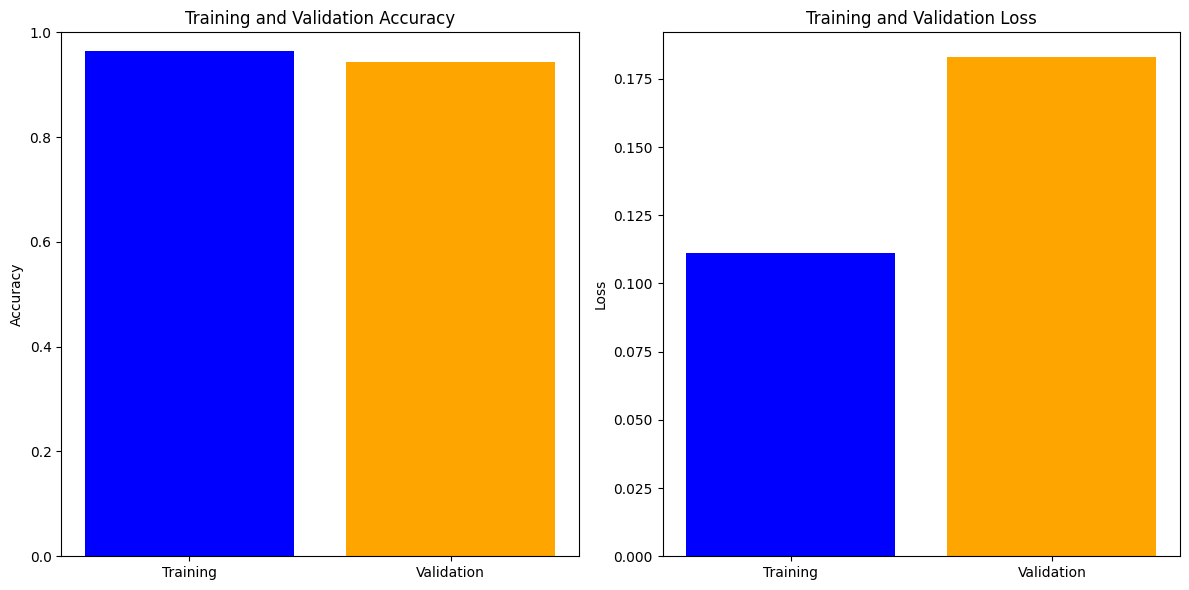

In [14]:
import matplotlib.pyplot as plt

train_acc = 0.9642221927642822
val_acc = 0.9437173008918762
train_loss = 0.1112
val_loss = 0.1829

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(['Training', 'Validation'], [train_acc, val_acc], color=['blue', 'orange'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.bar(['Training', 'Validation'], [train_loss, val_loss], color=['blue', 'orange'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step


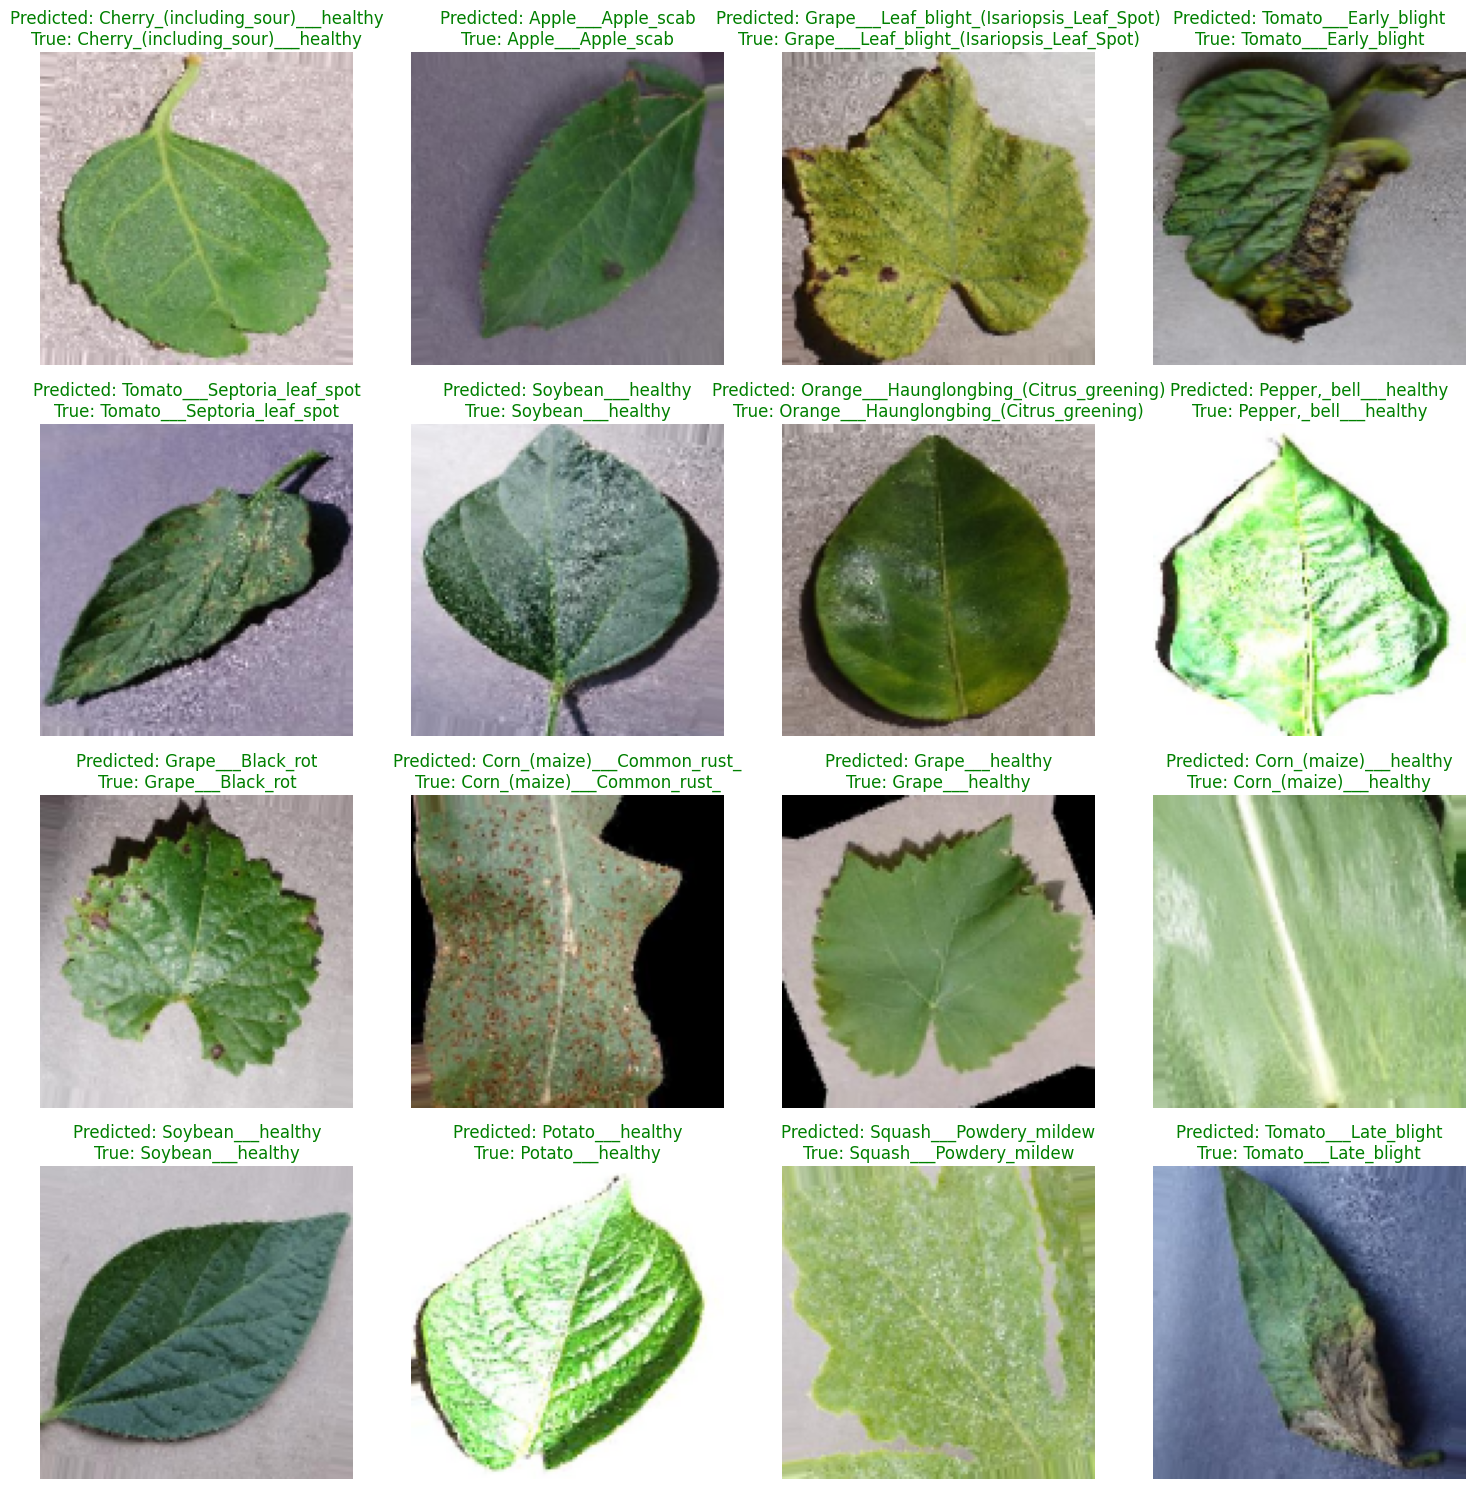

In [24]:
import matplotlib.pyplot as plt

# Get the class names from the train_generator
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15,15))
for image_batch, label_batch in train_generator:
    predictions = model.predict(image_batch)
    for i in range(min(len(image_batch), 16)):  # Limit to a maximum of 16 subplots
        ax = plt.subplot(4, 4, i+1)  # Adjust subplot layout as needed
        plt.imshow(image_batch[i])
        
        # Get the predicted label index
        predicted_label_index = predictions[i].argmax()
        predicted_label = class_names[predicted_label_index]  # Get the corresponding class name
        
        # Get the true label index
        true_label_index = label_batch[i].argmax()
        true_label = class_names[true_label_index]  # Get the corresponding class name
        
        # Display the true label in green if correct, red if incorrect
        color = 'green' if predicted_label_index == true_label_index else 'red'
        
        plt.title(f'Predicted plant: {predicted_label}\nActual plant: {true_label}', color=color)
        plt.axis("off")
    break  # Stop after the first batch
plt.tight_layout()
plt.show()

